<a href="https://colab.research.google.com/github/cappelchi/Graphs/blob/master/Graph_Algorithms_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Часть 1
**Графы** становятся центральными в машинном обучении, если хотите ли вы понять структуру социальной сети, прогнозируя потенциальные подключения, обнаруживая мошенничество, понимая поведение клиентов службы проката автомобилей или делая рекомендации в режиме реального времени.

*   Что такое график?
*   Как хранить график?
*   Типы и свойства графов


In [0]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Граф** - это совокупность взаимосвязанных верштн.
<img src="https://cdn-images-1.medium.com/max/1260/1*NJTrFOaUi3zi0jKYl7PRNg.png" width="400" height="200" />

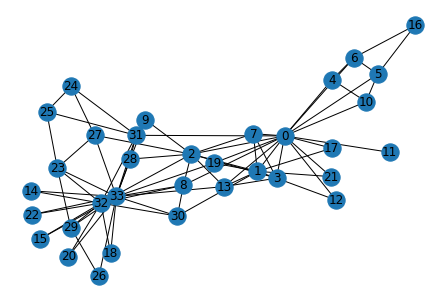

In [9]:
# Загрузим граф КАРАТЭ
G_karate = nx.karate_club_graph()
# Находим ключ - значение графа
pos = nx.spring_layout(G_karate)
# Рисуем
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

Что представляет этот график «каратэ»? «Социальная сеть каратэ-клуба была изучена Уэйном Захари в течение трех лет с 1970 по 1972 годы. В сеть входили 34 члена каратэ-клуба, которые общались вне клуба. Во время исследования возник конфликт между администратором «Джон А» и инструктором «Мистер». Что привело к расколу клуба на две части. Половина участников сформировали новый клуб вокруг мистера Привет; участники из другой части нашли нового инструктора или бросили каратэ. На основании собранных данных Захарий правильно определил всех, кроме одного члена клуба, в группы, к которым они фактически присоединились после раскола».

**Основные понятия графа**

Граф G = (V, E) состоит из:

вершин  V = 1,…, n

ребер E⊆V × V

ребро (I, J) ∈ E соединяет вершины I и J

I и J, 

Степень узла определяется числом его вершин

<img src="https://cdn-images-1.medium.com/max/1260/1*hfyW6YBKHk6S_z-3IKuRiw.png" width="450" height="300" />



*   [Полный граф](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D0%BD%D1%8B%D0%B9_%D0%B3%D1%80%D0%B0%D1%84), если все узлы имеют n − 1 соседей. Это будет означать, что все вершины связаны всеми возможными способами.
*   Путь от I до J представляет собой последовательность ребер , которая идет от I до J. Этот путь имеет длину, равную количеству ребер, через которые он проходит.
*   Диаметр графа называется длина самого длинного пути среди всех кратчайших путей , которые связывают любые две вершины.



In [0]:
n=34

In [11]:
G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [0]:
degree_sequence = list(G_karate.degree())

In [0]:
nb_nodes = n
nb_arr = len(G_karate.edges())
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [14]:
print("Количество вершин : " + str(nb_nodes))
print("Количество ребер : " + str(nb_arr))
print("Максимальная степень : " + str(max_degree))
print("Минимальная степень : " + str(min_degree))
print("Средняя степень : " + str(avg_degree))
print("Медиана степени : " + str(med_degree))

Количество узлов : 34
Количество ребер : 78
Максимум соседей : 17
Минимум соседей : 1
Среднее соседей : 4.588235294117647
Медиана соседей : 3.0


В среднем каждый человек общался с 4,6  другими людьми.
Гистограмма соседей.

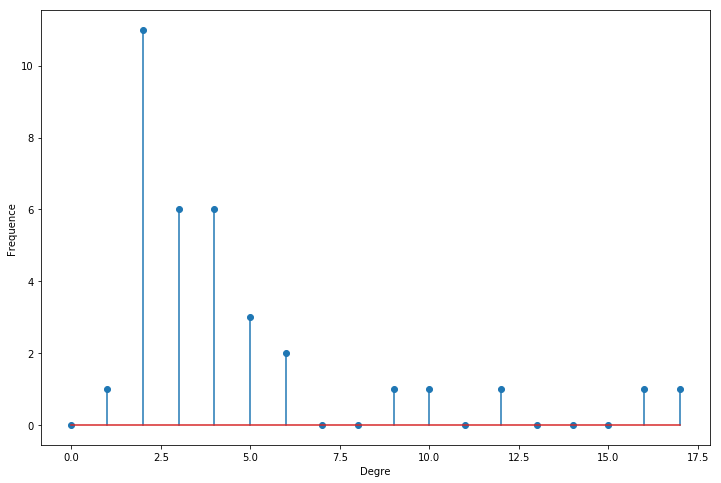

In [15]:
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

#Часть 2 Как хранится график?

Существует 3 способа хранения графиков, в зависимости от того, как мы хотим их использовать.

*   Идентификатор каждой пары вершин, связанных ребром.

*   Используя матрицу смежности, обычно загружаемую в память.

<img src="https://cdn-images-1.medium.com/max/1260/1*TdVVIX09Ooo5M-cEijW-LQ.png" width="300" height="100" />

*   Использовануя списки смежности

Графики обычно могут храниться в виде  .txt файлов.

#Часть 3 Типы графиков.

*   Erdos-Rényi
*   Barabasi-Albert


##Модель Erdos-Rényil

###Определение
В модели Эрдоша-Реньи мы строим модель случайного графа с n вершинами. Граф генерируется путем рисования ребра между парой вершин (i, j) независимо с вероятностью p. Поэтому у нас есть 2 параметра: количество вершин: n и вероятность: p.
<img src="https://cdn-images-1.medium.com/max/1260/1*uefkjkA5mu84rSQhxxsteA.png" width="600" height="240" />

Networkx имеет встроенную функцию для генерации графов Эрдоша-Реньи.

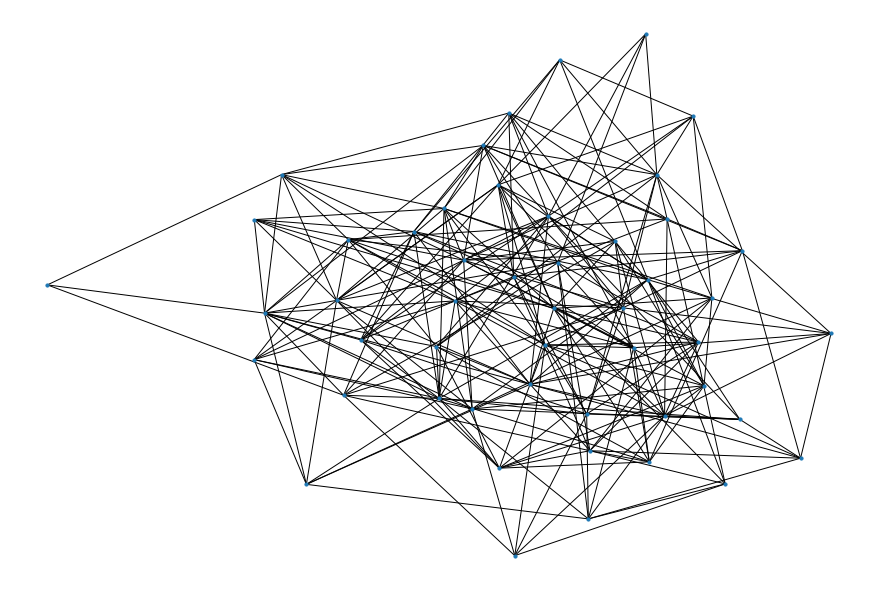

In [16]:
# Генерация графа
n = 50
p = 0.2
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)
# Рисование графа
plt.figure(figsize=(12,8))
nx.draw(G_erdos, node_size=10)

###Степень распределения

*Пусть pk вероятность того, что случайно выбранная вершина имеет степень k.* Из-за случайного способа построения графиков, распределение степеней графика является **биномиальным**  :

<img src="https://cdn-images-1.medium.com/max/1260/1*VY51_o_xZV8sH8eqMzCtQg.png" width="600" height="150" />

Распределение стеаеней  должно быть действительно близко к среднему. Вероятность наблюдать большое количество вершин уменьшается в по экспоненте.

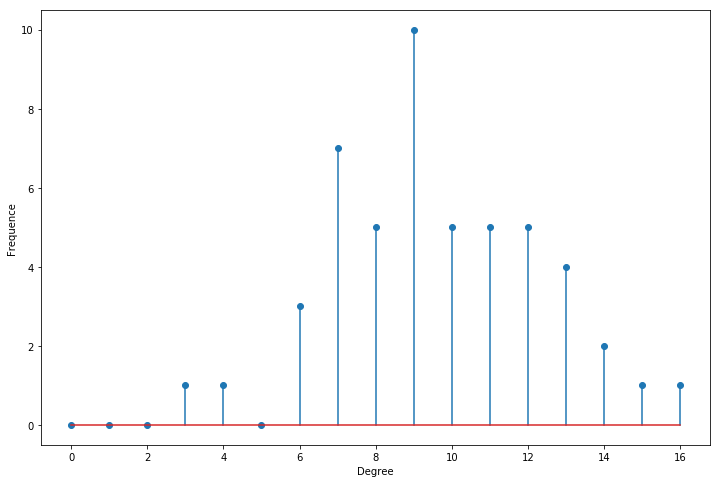

In [17]:
degree_freq = np.array(nx.degree_histogram(G_erdos)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

###Описательная статистика

Среднее по соседям определяется как n × p. С p = 0.2 и n = 200 мы сосредоточены вокруг 40.

Ожидание по соседям определяется как (n − 1) × p

Максимум пососедям сосредоточен вокруг среднего

In [18]:
# список соседей
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Количество вершин : " + str(nb_nodes))
print("Количество ребер : " + str(nb_arr))

print("Максимальная степень : " + str(max_degree))
print("Минимальная степень : " + str(min_degree))

print("Средняя степень: " + str(avg_degree))
print("Ожидаемая степень : " + str(esp_degree))
print("Медиана степеней: " + str(med_degree))

Количество узлов : 50
Количество ребер : 240
Максимум соседей : 16
Mинимум соседей : 3
Среднее соседей : 9.6
Ожидание по соседям : 9.8
Медиана по соседям : 9.0


##Модель Barabasi-Albert'a

###Определение

В модели Барабаси-Альберта мы строим модель случайного графа с n узлами с преимущественным компонентом присоединения. График генерируется по следующему алгоритму:

Шаг 1: С вероятностью p перейдите ко второму шагу. Иначе, переходите к третьему шагу.

Шаг 2: Подключение новой вершины к существующим вершинам случайно равномерно.

Шаг 3: Подключите новую вершину к n существующим вершинам с вероятностью, пропорциональной их степени.

В Networkx пакет также имеет встроенную функцию для генерации графов Барабаси-Альберта.

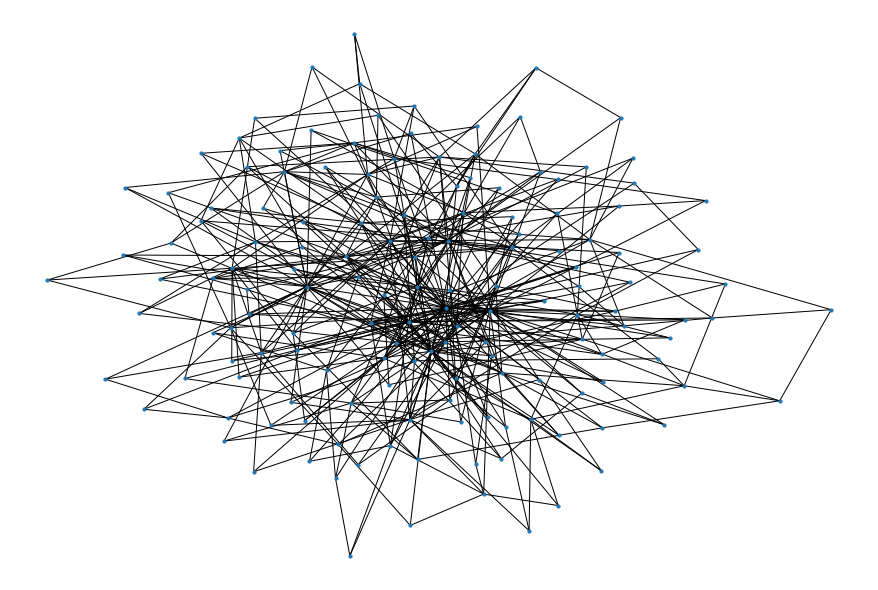

In [19]:
# Генерация графа
n = 150
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)
# Рисование
plt.figure(figsize=(12,8))
nx.draw(G_barabasi, node_size=10)

###Распределение степеней

Пусть pk вероятность того, что случайно выбранная вершина имеет степень k. Распределение степени следует закону:
<img src="https://cdn-images-1.medium.com/max/1260/1*LXXbxvxJ3Rn5Na3bCnfv6Q.png" width="600" height="100" />



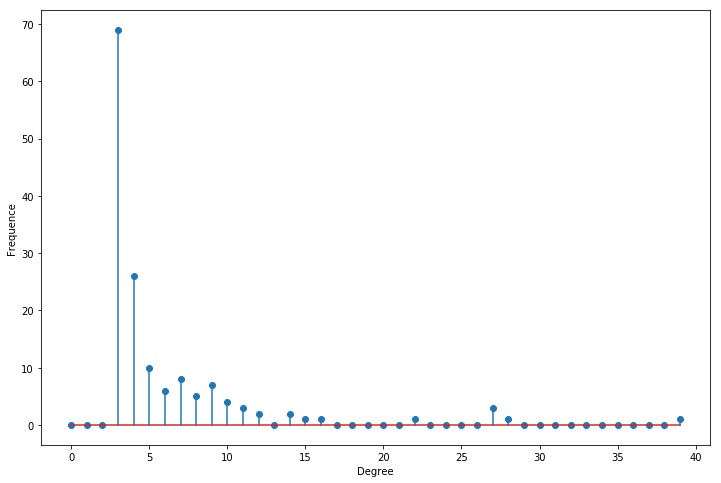

In [20]:
degree_freq = np.array(nx.degree_histogram(G_barabasi)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

###Описательная статистика

*   Средняя степень постоянна, если α≤2, иначе она расходится
*   Максимальная степень имеет следующий порядок:

<img src="https://cdn-images-1.medium.com/max/1260/1*qdlY3c0aSOTG5abJn7Ab9w.png" width="150" height="100" />

In [21]:
# Список стеаеней
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Количество вершин : " + str(nb_nodes))
print("Количество ребер : " + str(nb_arr))

print("Максимальная степень : " + str(max_degree))
print("Минимальная степень : " + str(min_degree))

print("Средняя степень : " + str(avg_degree))
print("Ожидаемая степень : " + str(esp_degree))
print("Медиана степени : " + str(med_degree))

Количество вершин : 150
Количество ребер : 240
Максимальная степень : 16
Минимальная степень : 3
Средняя степень : 9.6
Ожидаемая степень : 29.8
Медиана степени : 9.0
